<a href="https://colab.research.google.com/github/IvanUlloa098/simulacion/blob/main/tarea_10/tarea_interrupciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practica Interrupciones
## Ivan Ulloa

In [1]:
!pip install simpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import simpy
import random
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [40]:
AFORO=200
CONTAGIO=0.1 # Porcentaje de poblacion ya contagiada
PROB_CONTAGIO=0.02 # Probabilidad de contagio usando mascarilla por hora
TIEMPO_SIMULACION = 30 # Minutos
HORAS_SERVICIO = 8 # Tiempo maximo que los estudiantes pasan en el instituto
UNIVERSO=AFORO*TIEMPO_SIMULACION

In [41]:
class Instituto(object):    
  def __init__(self, environment, aforo):        
    self.env=environment
    self.aforo = simpy.Resource(environment, aforo)   
      
  def ingreso_alumno(self, alumno, id, contagio):
    if(alumno==0):
      distribucion[id]=contagio

    yield self.env.timeout(1)
  
  def generador_contagio(self, tiempo_estadia):
    contagios=stats.bernoulli(tiempo_estadia*PROB_CONTAGIO) # Contagio determinado por el numero de horas en el instituto
    return contagios.rvs(1)[0]
    
def llegada_establecimineto(env, alumno, id, contagio, instituto):  
  #print(f'El alumno {id} ha llegado al establecimiento')
  with instituto.aforo.request() as aforo:        
      yield aforo
      yield env.process(instituto.ingreso_alumno(alumno,id,contagio)) # La cantidad de minutos que se queda en el instituto en aleatoria

def run_simulation(env):
  instituto=Instituto(env, AFORO)
  
  DIA=0

  while True:
    print(f'Inicia la simulacion del dia {DIA+1}')
    for k in range(AFORO):
      aux = instituto.generador_contagio(random.randint(1,HORAS_SERVICIO))
      CONT_ACUMULADO.append(aux)
      env.process(llegada_establecimineto(env, distribucion[k],k,aux,instituto))
    
    if(DIA==(TIEMPO_SIMULACION-1)):
      print(f'Simulacion del dia {DIA+1} concluida. Se detectaron {CONT_ACUMULADO.count(1)} contagios')
      break
    else:
      print(f'Simulacion del dia {DIA+1} concluida. Se detectaron {CONT_ACUMULADO.count(1)} contagios')
      DIA+=1

    t=env.now
    CONTG[t]=CONT_ACUMULADO.count(1)
    CONT_ACUMULADO.clear()

    yield env.timeout(1)

In [42]:
CONT_ACUMULADO=[]
CONTG={}

bernoulli = stats.bernoulli(CONTAGIO)
distribucion = bernoulli.rvs(UNIVERSO)

env=simpy.Environment()
env.process(run_simulation(env))
# Ejecutamos el proceso durante el tiempo de simulacion
env.run(until = TIEMPO_SIMULACION)

Inicia la simulacion del dia 1
Simulacion del dia 1 concluida. Se detectaron 20 contagios
Inicia la simulacion del dia 2
Simulacion del dia 2 concluida. Se detectaron 18 contagios
Inicia la simulacion del dia 3
Simulacion del dia 3 concluida. Se detectaron 19 contagios
Inicia la simulacion del dia 4
Simulacion del dia 4 concluida. Se detectaron 20 contagios
Inicia la simulacion del dia 5
Simulacion del dia 5 concluida. Se detectaron 17 contagios
Inicia la simulacion del dia 6
Simulacion del dia 6 concluida. Se detectaron 10 contagios
Inicia la simulacion del dia 7
Simulacion del dia 7 concluida. Se detectaron 18 contagios
Inicia la simulacion del dia 8
Simulacion del dia 8 concluida. Se detectaron 14 contagios
Inicia la simulacion del dia 9
Simulacion del dia 9 concluida. Se detectaron 22 contagios
Inicia la simulacion del dia 10
Simulacion del dia 10 concluida. Se detectaron 17 contagios
Inicia la simulacion del dia 11
Simulacion del dia 11 concluida. Se detectaron 18 contagios
Inicia

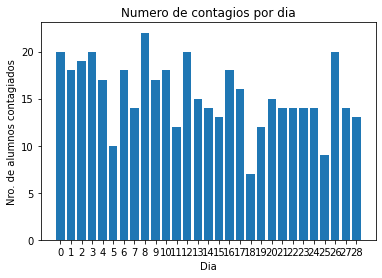

In [43]:
etiqueta = list(CONTG.keys())
valores = list(CONTG.values())

plt.bar(range(len(CONTG)), valores, align="center", tick_label=etiqueta)
plt.title("Numero de contagios por dia")
plt.xlabel("Dia")
plt.ylabel("Nro. de alumnos contagiados")
plt.show()